<a href="https://colab.research.google.com/github/roberto-takada/PDIE8-notebooks/blob/main/TransformadaFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R. Takada

## Transformada de Fourier

Importando a biblioteca OS para poder colocar as imagens em uma lista.

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

imageNames = os.listdir('./images')
images = [Image.open('./images/' + img).convert('L') for img in imageNames]

Criando a imagem com fundo branco e quadrado simulando a função sinc

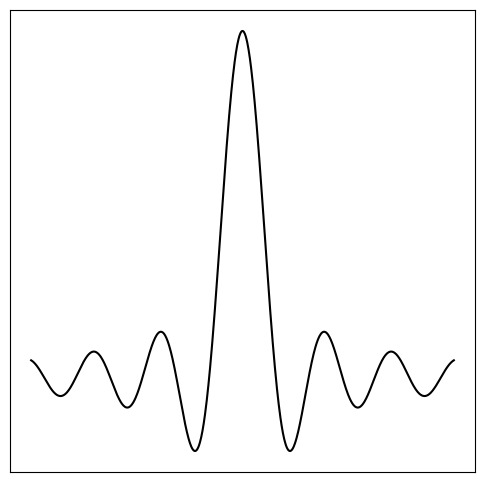

In [4]:
def sinc(x):
    return np.sinc(x / np.pi)
x = np.linspace(-20, 20, 1000)
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, sinc(x), color="black")
ax.set_facecolor("white")
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.savefig("./images/SINC.png", bbox_inches='tight', dpi=300, facecolor="white")

Função para Transformada de Fourier

In [38]:
def FourierTransform(imagem):
  f = np.fft.fft2(imagem)
  f_shift = np.fft.fftshift(f)
  fourier = np.log(np.abs(f_shift))
  angle = np.angle(f_shift)
  return fourier, angle

Função para Transformada Inversa de Fourier

In [36]:
def FourierInverse(imagem):
  inv_fourier = np.fft.ifftshift(imagem)
  inv_fourier = np.fft.ifft2(inv_fourier)
  return np.abs(inv_fourier)

Plotando espectro e fase

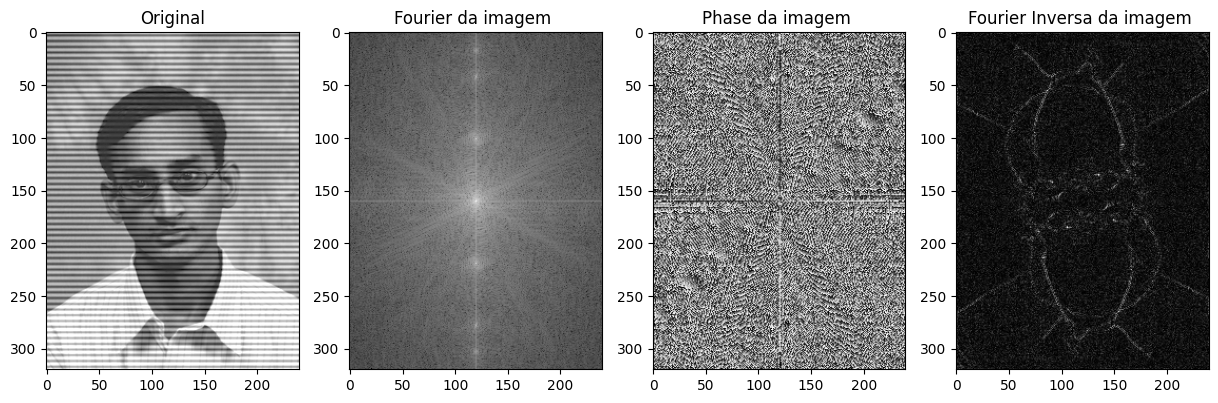

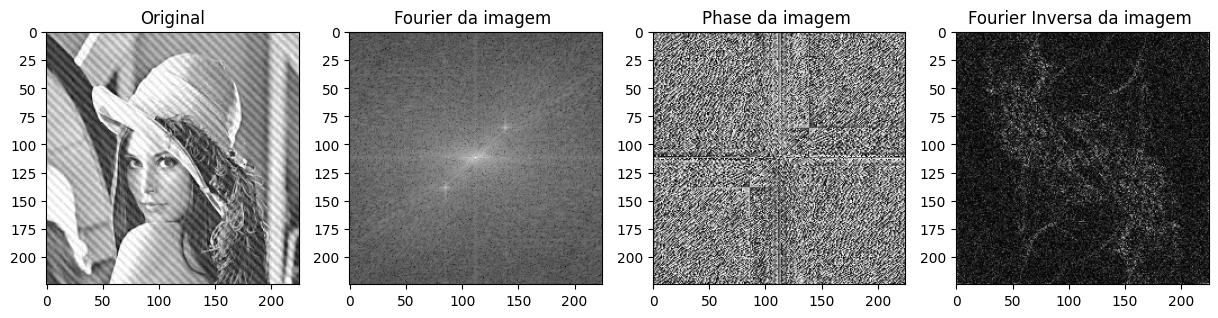

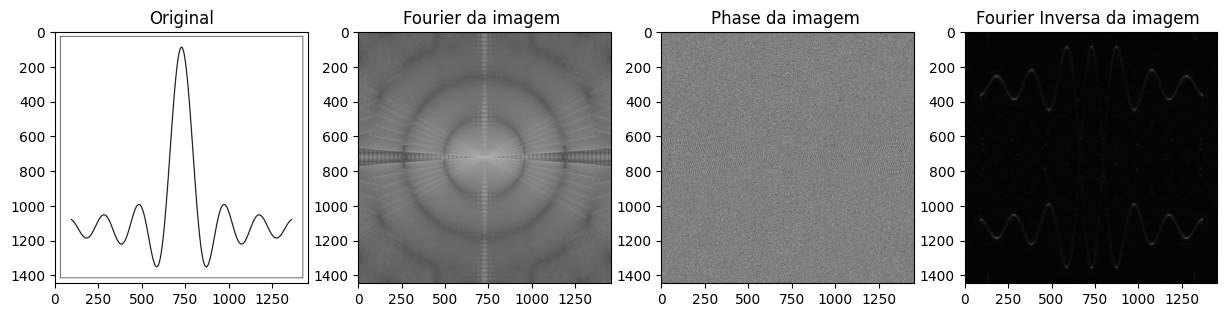

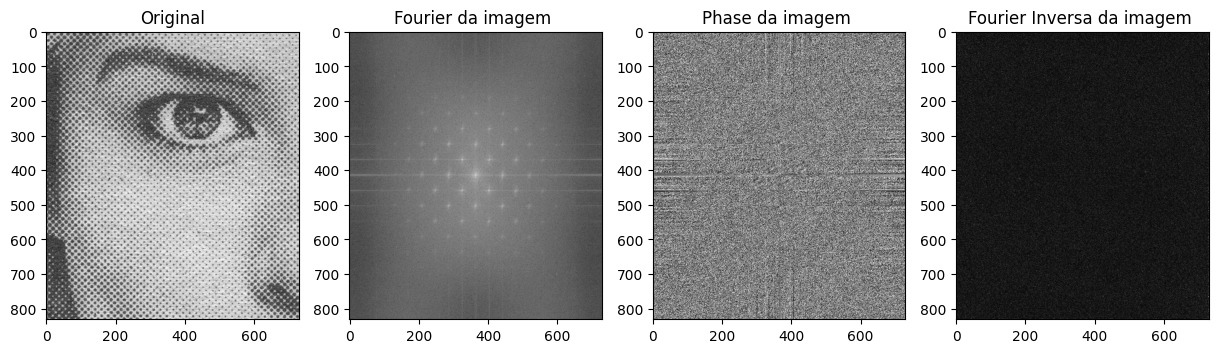

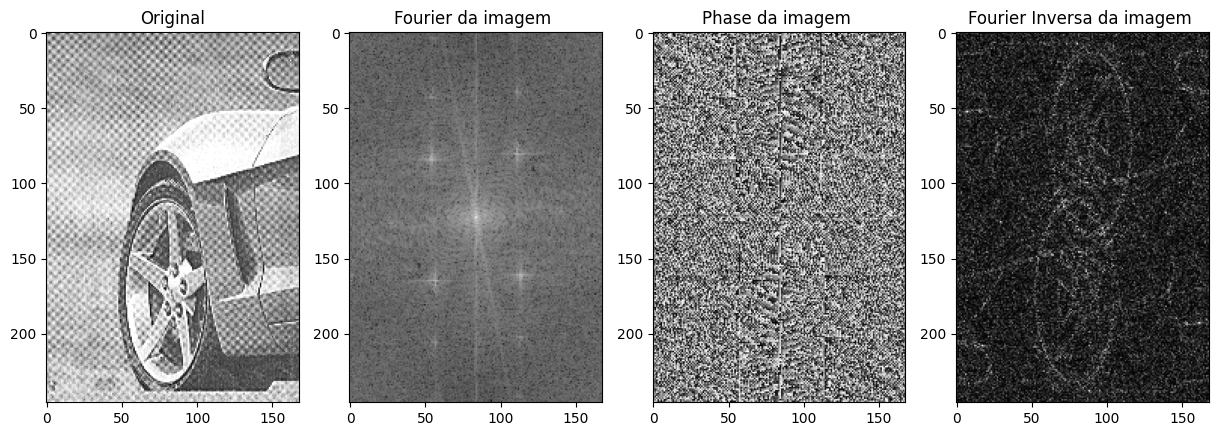

In [40]:
for index in range(len(images)):
    imagem = images[index]
    imagemFourier, imagemPhase = FourierTransform(imagem)
    imagemFourierInverse = FourierInverse(imagemPhase)

    fig, axis = plt.subplots(1, 4, figsize=(15, 5))
    axis[0].imshow(imagem, cmap='gray')
    axis[0].set_title('Original')

    axis[1].imshow(imagemFourier, cmap='gray')
    axis[1].set_title('Fourier da imagem ')

    axis[2].imshow(imagemPhase, cmap='gray')
    axis[2].set_title('Phase da imagem ')

    axis[3].imshow(imagemFourierInverse, cmap='gray')
    axis[3].set_title('Fourier Inversa da imagem ')

Plotando espectro em 3D

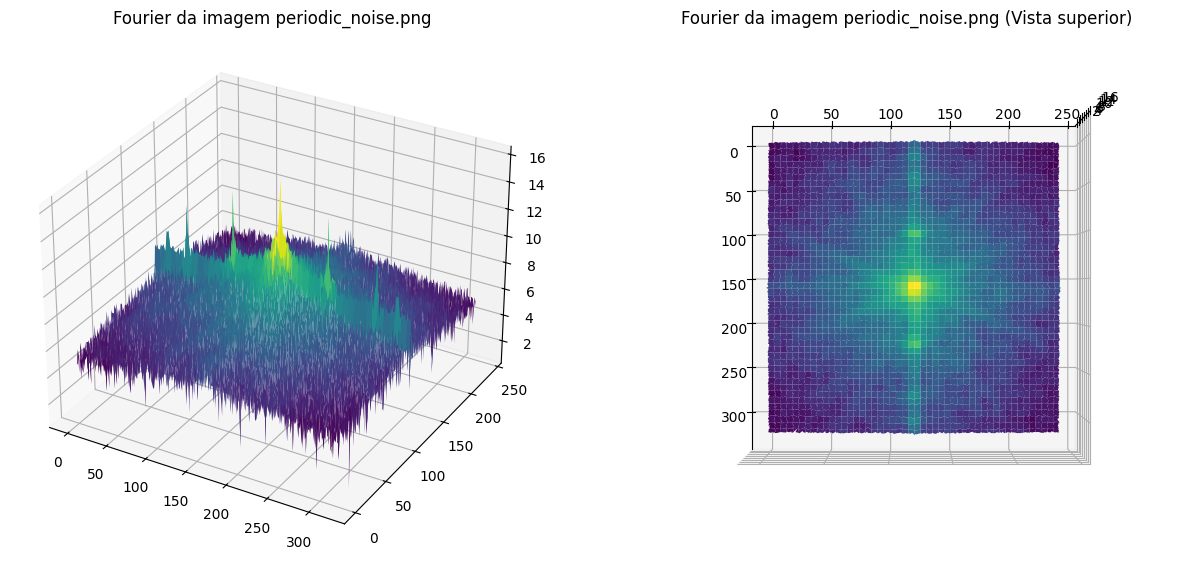

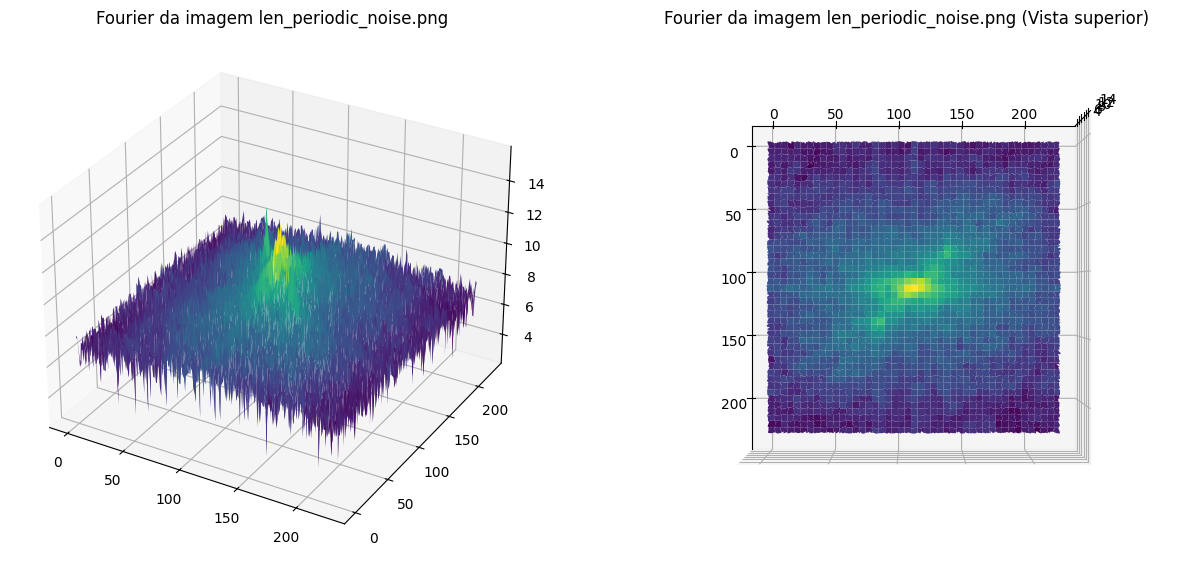

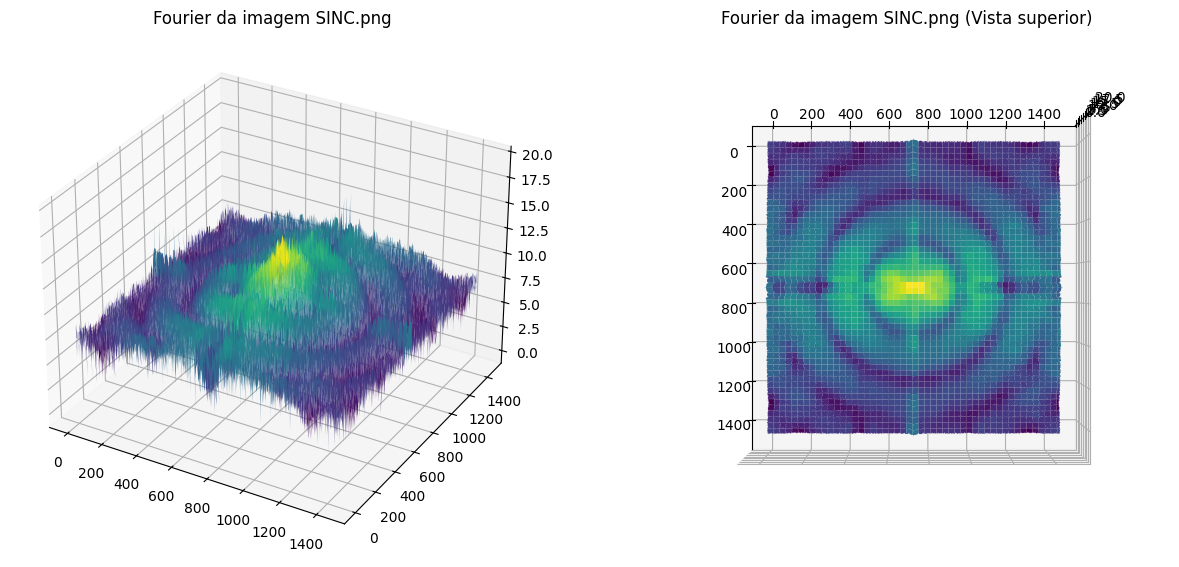

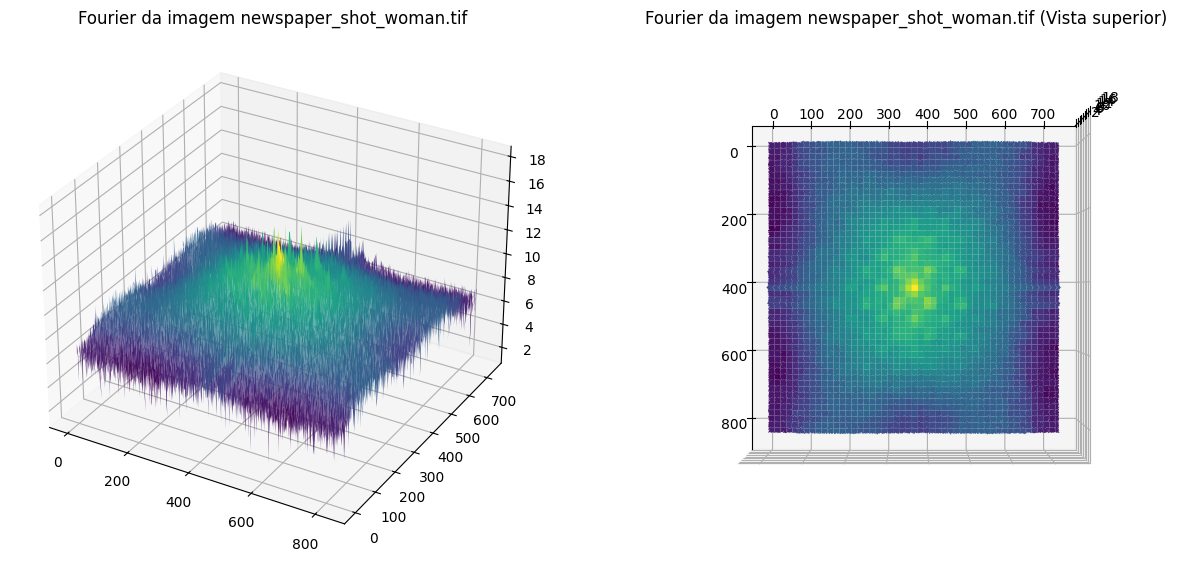

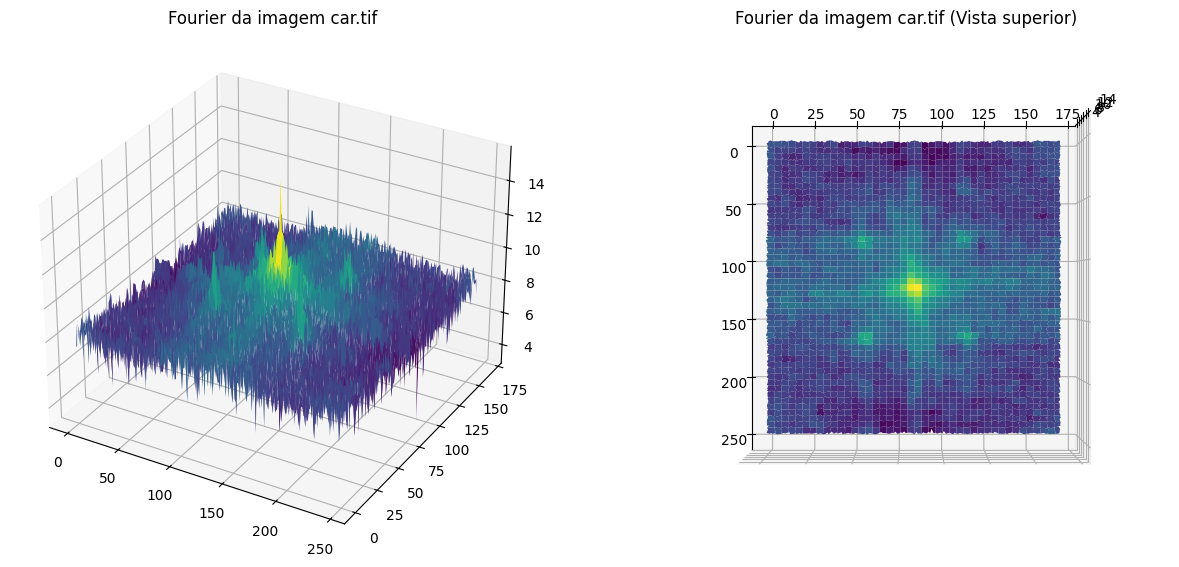

In [41]:
for index in range(len(images)):
    imagem = images[index]
    imagemFourier, imagemPhase = FourierTransform(imagem)

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(221, projection='3d')
    x = np.arange(0, imagemFourier.shape[0], 1)
    y = np.arange(0, imagemFourier.shape[1], 1)
    X, Y = np.meshgrid(x, y)
    Z = imagemFourier[X, Y]

    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Fourier da imagem ' + imageNames[index])


    ax = fig.add_subplot(222, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.view_init(90, 0)
    ax.set_title('Fourier da imagem ' + imageNames[index] + ' (Vista superior)')

    plt.show()